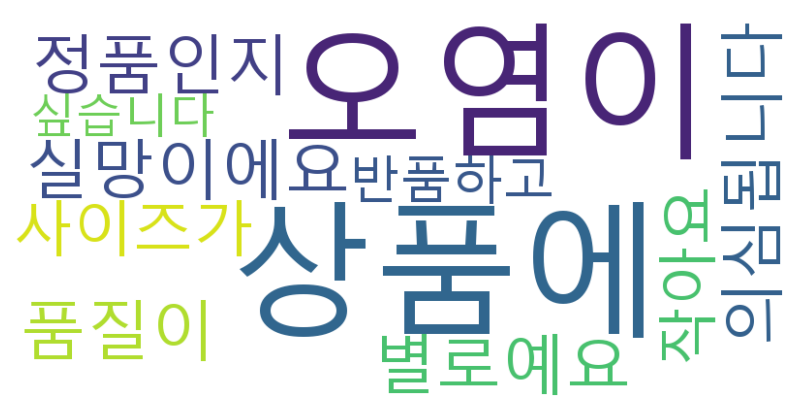

In [2]:
import pandas as pd
import re
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# 1. CSV 불러오기 (cp949 인코딩 주의)
df = pd.read_csv('data/voc_data.csv', encoding='cp949')

# 2. 명사 비슷한 단어 뽑기 (2글자 이상 한글 단어) + 불용어 제거
stopwords = ['상품', '너무', '있어요', '합니다', '했습니다', '정말', '진짜', '좀']

df['명사'] = df['텍스트'].apply(lambda x: re.findall(r"[가-힣]{2,}", x))
df['명사_정제'] = df['명사'].apply(lambda tokens: [t for t in tokens if t not in stopwords])
df['명사_문자열'] = df['명사_정제'].apply(lambda x: ' '.join(x))

# 3. 워드클라우드
text = ' '.join(df['명사_문자열'])

wc = WordCloud(
    font_path='C:/Windows/Fonts/malgun.ttf',  # 한글 폰트 경로
    background_color='white',
    width=800,
    height=400
).generate(text)

plt.figure(figsize=(10, 6))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [4]:
# 📦 1단계: 라이브러리 불러오기
import pandas as pd
import re
from sklearn.feature_extraction.text import TfidfVectorizer

# 📥 2단계: CSV 불러오기
df = pd.read_csv('data/voc_faq_dummy.csv')
print("✅ 데이터 불러오기 완료")
print(df.head())

# 🧼 3단계: 텍스트 정제 함수 정의
def clean_text(text):
    text = str(text).lower()
    text = re.sub('[^ㄱ-ㅎ가-힣a-zA-Z0-9 ]', '', text)
    text = re.sub(' +', ' ', text)  # 중복 띄어쓰기 제거
    return text.strip()

# 전처리 적용
df['clean_text'] = df['질문내용'].apply(clean_text)
print("\n✅ 전처리 결과 샘플")
print(df[['질문내용', 'clean_text']].head())

# ✏️ 4단계: TF-IDF 벡터화
vectorizer = TfidfVectorizer(max_features=100)
X = vectorizer.fit_transform(df['clean_text'])

# 결과 확인
print(f"\n✅ TF-IDF 완료! 벡터 형태: {X.shape}")
print(f"예시 단어들: {vectorizer.get_feature_names_out()[:10]}")


✅ 데이터 불러오기 완료
   id                      질문내용  카테고리        유형
0   1          도착한 상품에 하자가 있어요.    구매     품질 이슈
1   2  검수 기준을 악용하면 어떤 불이익이 있나요?  이용정책  검수 기준 악용
2   3           수수료는 어떻게 책정되나요?  이용정책    수수료 기준
3   4       가품 판매 적발되면 어떻게 되나요?  이용정책     가품 제재
4   5         상품 배송일정은 어떻게 되나요?    구매      배송일정

✅ 전처리 결과 샘플
                       질문내용               clean_text
0          도착한 상품에 하자가 있어요.          도착한 상품에 하자가 있어요
1  검수 기준을 악용하면 어떤 불이익이 있나요?  검수 기준을 악용하면 어떤 불이익이 있나요
2           수수료는 어떻게 책정되나요?           수수료는 어떻게 책정되나요
3       가품 판매 적발되면 어떻게 되나요?       가품 판매 적발되면 어떻게 되나요
4         상품 배송일정은 어떻게 되나요?         상품 배송일정은 어떻게 되나요

✅ TF-IDF 완료! 벡터 형태: (100, 86)
예시 단어들: ['가능한가요' '가품' '같아요' '거래' '걸리나요' '검수' '검수는' '구매' '궁금해요' '기능']


In [8]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import matplotlib as mpl

# 한글 폰트 설정 (Windows용 - 맑은 고딕)
mpl.rc('font', family='Malgun Gothic')

# 마이너스 깨짐 방지
mpl.rcParams['axes.unicode_minus'] = False

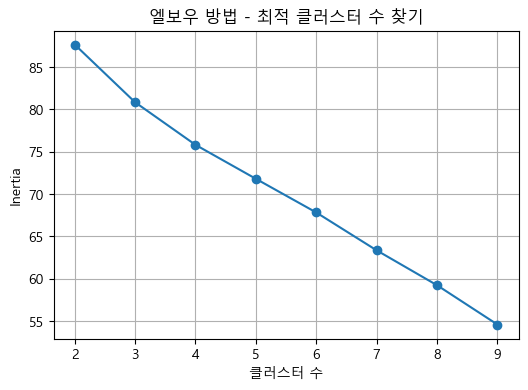

In [9]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# 1. 최적 클러스터 수 찾기 (엘보우 방법)
inertias = []
k_range = range(2, 10)

for k in k_range:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X)
    inertias.append(km.inertia_)

# 2. 시각화

plt.figure(figsize=(6, 4))
plt.plot(k_range, inertias, marker='o')
plt.title("엘보우 방법 - 최적 클러스터 수 찾기")
plt.xlabel("클러스터 수")
plt.ylabel("Inertia")
plt.grid(True)
plt.show()

In [10]:
from sklearn.cluster import KMeans

# KMeans 클러스터링 수행
kmeans = KMeans(n_clusters=4, random_state=42)
df['클러스터'] = kmeans.fit_predict(X)

# 각 클러스터에 몇 개씩 들어갔는지 확인
print(df['클러스터'].value_counts().sort_index())
df[['질문내용', '카테고리', '유형', '클러스터']].head(10)


클러스터
0    10
1    27
2    14
3    49
Name: count, dtype: int64


,질문내용,카테고리,유형,클러스터
0,도착한 상품에 하자가 있어요.,구매,품질 이슈,3
1,검수 기준을 악용하면 어떤 불이익이 있나요?,이용정책,검수 기준 악용,3
2,수수료는 어떻게 책정되나요?,이용정책,수수료 기준,0
3,가품 판매 적발되면 어떻게 되나요?,이용정책,가품 제재,1
4,상품 배송일정은 어떻게 되나요?,구매,배송일정,1
5,검수 보류 시 어떻게 되나요?,판매,검수 실패,1
6,빠른 배송 거래 후 어떻게 진행되나요?,구매,거래 진행,1
7,거래 실패 시 반송 기준은 어떻게 되나요?,이용정책,반송 기준,1
8,검수 불합격되면 어떻게 하나요?,판매,검수 실패,1
9,프리미엄 배송과 일반 배송 차이는?,구매,프리미엄 배송,2


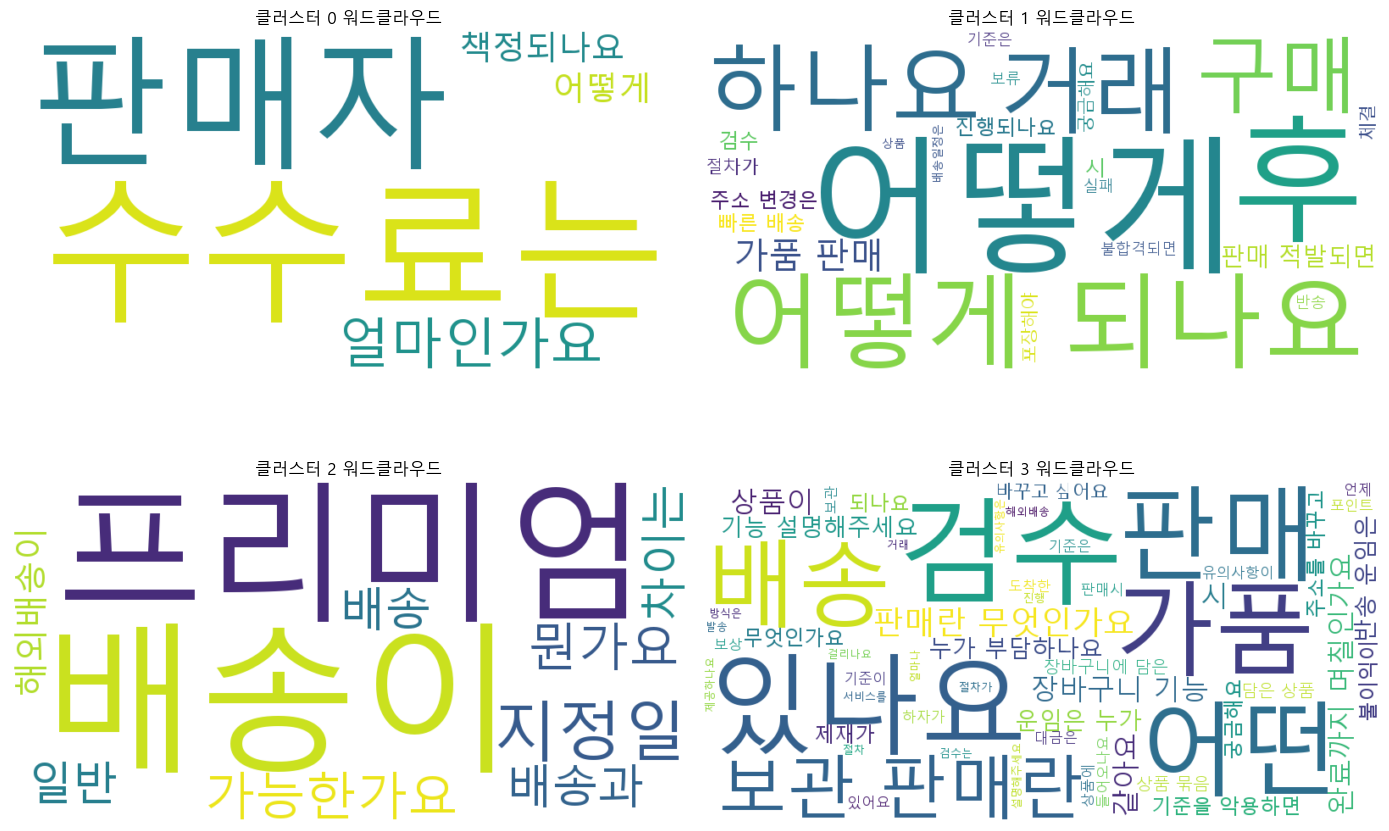

In [11]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import matplotlib as mpl

# 한글 폰트 설정
mpl.rc('font', family='Malgun Gothic')
mpl.rcParams['axes.unicode_minus'] = False

# 클러스터별 텍스트 합치기
cluster_texts = df.groupby('클러스터')['clean_text'].apply(lambda x: ' '.join(x))

# 워드클라우드 시각화
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

for idx, (cluster_id, text) in enumerate(cluster_texts.items()):
    wc = WordCloud(font_path='C:/Windows/Fonts/malgun.ttf', background_color='white', width=800, height=400).generate(text)
    axes[idx].imshow(wc, interpolation='bilinear')
    axes[idx].set_title(f'클러스터 {cluster_id} 워드클라우드')
    axes[idx].axis('off')

plt.tight_layout()
plt.show()


In [12]:
# 6. 결과 저장
df.to_csv("data/voc_faq_dummy.csv", index=False)
print("\n✅ '클러스터' 컬럼 추가 및 저장 완료!")


✅ '클러스터' 컬럼 추가 및 저장 완료!
